In [3]:
#Importing the Dependencies

In [4]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
#Data Collection & Processing

In [8]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [9]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [11]:
exercise_data = pd.read_csv('exercise 2.csv')

In [12]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
#Combining the two Dataframes

In [15]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [16]:
#introducing NAN values
#10% of the total values are turned into NAN
np.random.seed(42)
missing_percentage = 0.1
mask = np.random.rand(*calories_data.shape) < missing_percentage
calories_data[mask] = np.nan
print(calories_data)

          User_ID  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363.0    male  68.0   190.0    94.0      29.0         NaN   
1      14861698.0     NaN  20.0   166.0    60.0      14.0        94.0   
2      11179863.0    male  69.0   179.0    79.0       5.0        88.0   
3      16180408.0  female   NaN   179.0    71.0       NaN       100.0   
4      17771927.0     NaN  27.0   154.0    58.0      10.0         NaN   
...           ...     ...   ...     ...     ...       ...         ...   
14995  15644082.0  female  20.0   193.0    86.0      11.0        92.0   
14996  17212577.0  female  27.0   165.0     NaN       6.0         NaN   
14997  17271188.0  female  43.0     NaN    58.0      16.0        90.0   
14998  18643037.0    male  78.0   193.0     NaN       2.0        84.0   
14999  11751526.0    male  63.0   173.0    79.0      18.0        92.0   

       Body_Temp  Calories  
0           40.8     231.0  
1           40.3      66.0  
2           38.7      26.0  
3      

In [17]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363.0,male,68.0,190.0,94.0,29.0,NaN,40.8,231.0
1,14861698.0,NaN,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863.0,male,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408.0,female,NaN,179.0,71.0,NaN,100.0,40.5,71.0
4,17771927.0,NaN,27.0,154.0,58.0,10.0,NaN,39.8,35.0


In [18]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [19]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     13483 non-null  float64
 1   Gender      13465 non-null  object 
 2   Age         13535 non-null  float64
 3   Height      13498 non-null  float64
 4   Weight      13477 non-null  float64
 5   Duration    13486 non-null  float64
 6   Heart_Rate  13504 non-null  float64
 7   Body_Temp   13473 non-null  float64
 8   Calories    13478 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [20]:
# checking for missing values, now there will be missing values as we have introduced them
calories_data.isnull().sum()

User_ID       1517
Gender        1535
Age           1465
Height        1502
Weight        1523
Duration      1514
Heart_Rate    1496
Body_Temp     1527
Calories      1522
dtype: int64

In [21]:
#data analysis

In [35]:
#calculating the mean of each column and filling the missing values using this
numeric_cols = calories_data.select_dtypes(include=[np.number])
mean_values = numeric_cols.mean()
calories_data_filled = calories_data.fillna(mean_values)

In [36]:
#verifying that NAN values have been elliminated
calories_data_filled.isnull().sum()

User_ID          0
Gender        1535
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Calories         0
dtype: int64

In [37]:
print(calories_data.dtypes)

User_ID       float64
Gender         object
Age           float64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


In [38]:
# get some statistical measures about the data using describe function
calories_data_filled.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497264e+07,42.766383,174.464143,74.950805,15.551906,95.489188,40.022682,89.707672
std,2.723109e+06,16.144151,13.562923,14.266730,7.881469,9.114580,0.740535,59.124628
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.276885e+07,29.000000,165.000000,64.000000,9.000000,89.000000,39.700000,40.000000
50%,1.497264e+07,42.766383,174.464143,74.950805,15.551906,95.489188,40.100000,89.707672
75%,1.714677e+07,54.000000,184.000000,85.000000,22.000000,102.000000,40.600000,130.250000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [39]:
#Data Visualization

In [40]:
sns.set()

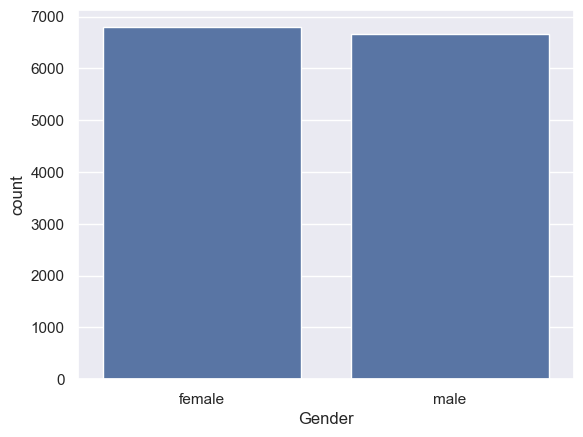

In [41]:
# Convert 'Gender' column, which is categorical data, to numerical data for ease of data manipulation and extraction
calories_data['Gender'] = calories_data['Gender'].astype('category')

# Creating a count plot for gender
sns.countplot(x='Gender', data=calories_data)

# Show the plot
plt.show()

/var/folders/dt/x562_n_n6ys39cwb8xr4xs9c0000gn/T/ipykernel_6633/1601633407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data_filled['Age'])


<Axes: xlabel='Age', ylabel='Density'>

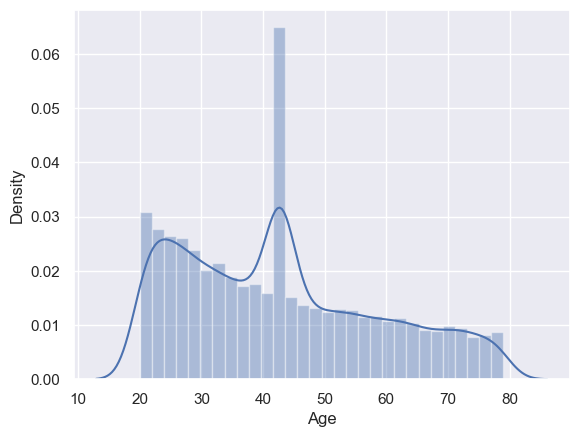

In [42]:
# finding the distribution of "Age" column
sns.distplot(calories_data_filled['Age'])

In [43]:
"""" inferences: 
1: age attribute is not uniformly distributed
2: max density of age in our data set is around 42
3: min density of age in our data set is around 74
"""

'" inferences: \n1: age attribute is not uniformly distributed\n2: max density of age in our data set is around 42\n3: min density of age in our data set is around 74\n'

/var/folders/dt/x562_n_n6ys39cwb8xr4xs9c0000gn/T/ipykernel_6633/1999209616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data_filled['Height'])


<Axes: xlabel='Height', ylabel='Density'>

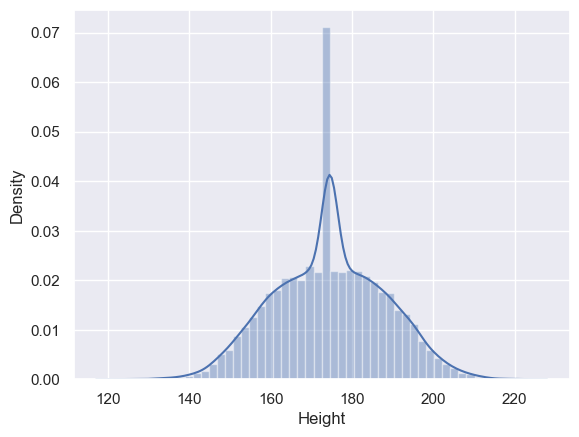

In [44]:
# finding the distribution of "Height" column
sns.distplot(calories_data_filled['Height'])

In [45]:
'''inferences:
1: height attribute is approximately uniformly distributed
2: max density of height in our data set is around 174-176
3: min density of height in our data set is around the ends
'''

'inferences:\n1: height attribute is approximately uniformly distributed\n2: max density of height in our data set is around 174-176\n3: min density of height in our data set is around the ends\n'

/var/folders/dt/x562_n_n6ys39cwb8xr4xs9c0000gn/T/ipykernel_6633/1061756706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data_filled['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

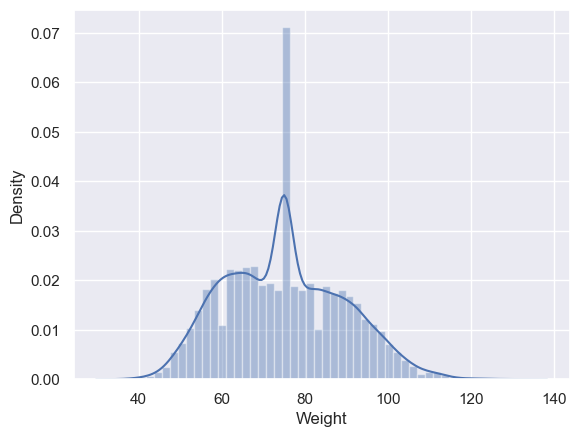

In [46]:
# finding the distribution of "Weight" column
sns.distplot(calories_data_filled['Weight'])

In [48]:
'''inferences:
1: weight attribute is approximately uniformly distributed
2: max density of weight in our data set is around 74
3: min density of weight in our data set is around the ends
'''

'inferences:\n1: weight attribute is approximately uniformly distributed\n2: max density of weight in our data set is around 74\n3: min density of weight in our data set is around the ends\n'

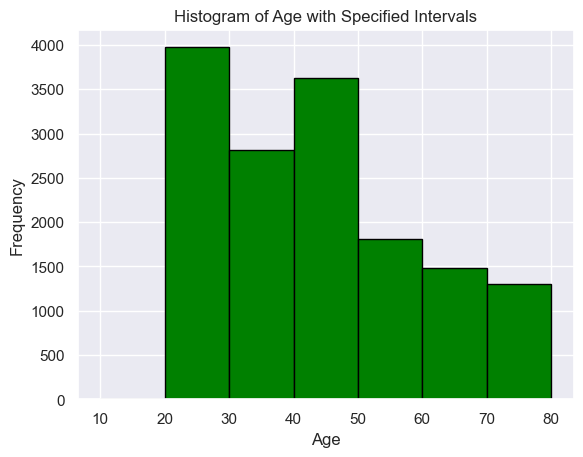

In [49]:
#showing age frequency
age_intervals = [10,20, 30, 40, 50, 60, 70, 80]  # Specify the intervals you want
plt.hist(calories_data_filled['Age'], bins=age_intervals, edgecolor='black',color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Specified Intervals')
plt.show()

In [51]:
#inference: the max number of people lie between 20-30 age group

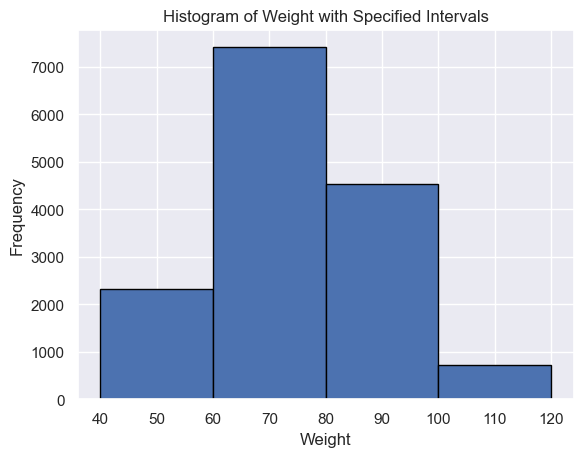

In [52]:
#showing weight frequency
weight_intervals = [40,60,80,100,120]  # Specify the intervals you want
plt.hist(calories_data_filled['Weight'], bins=weight_intervals, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight with Specified Intervals')
plt.show()

In [53]:
#inference: the max number of people lie between 60-80 weight

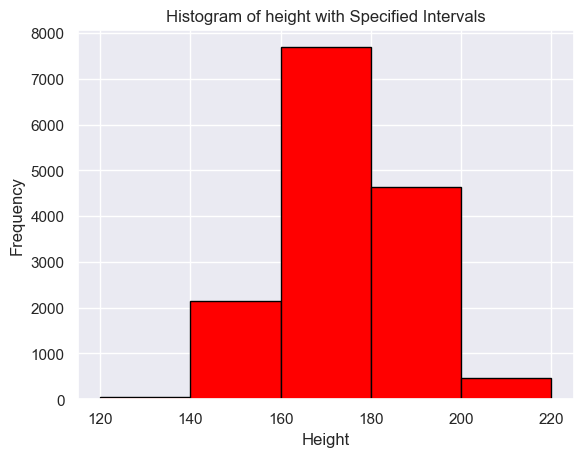

In [54]:
#showing height frequency
height_intervals = [120,140,160,180,200,220]  # Specify the intervals you want
plt.hist(calories_data_filled['Height'], bins=height_intervals, edgecolor='black',color='red')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of height with Specified Intervals')
plt.show()

In [55]:
#inference: the max number of people lie between 160-180 height

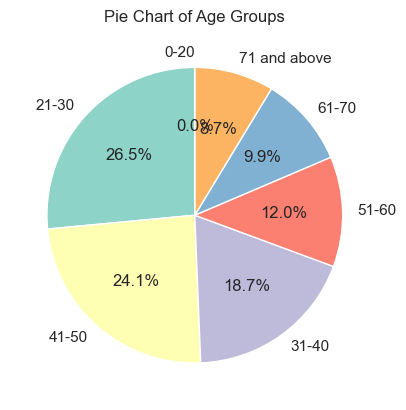

In [56]:
#making a pie chart of age groups that basically shows the percentage wise distribution of age
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71 and above']
calories_data['age_group'] = pd.cut(calories_data_filled['Age'], bins=[0, 20, 30, 40, 50, 60, 70, float('inf')],
                                    labels=age_groups, right=False)
# Calculate counts for each age group
age_group_counts = calories_data['age_group'].value_counts()
# Create a pie chart
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Pie Chart of Age Groups')
plt.show()

In [57]:
'''inferences:
this pie chart shows the percentage wise distribution of age groups of people in our data set.
the max number of people in our data set lie between 21-30, 26.5%.'''

'inferences:\nthis pie chart shows the percentage wise distribution of age groups of people in our data set.\nthe max number of people in our data set lie between 21-30, 26.5%.'

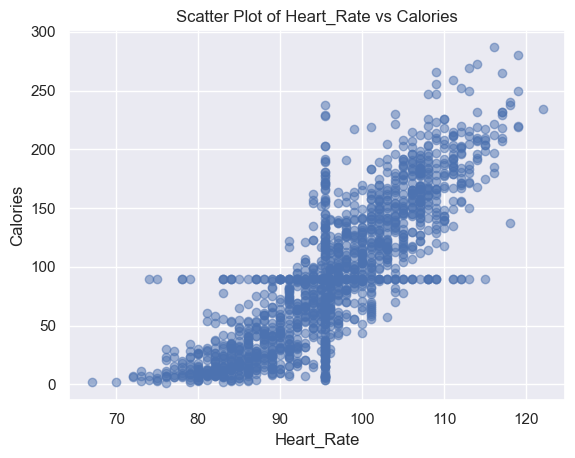

In [58]:
#making a scatter plot heart rate vs calories
plt.title('Scatter Plot of Heart_Rate vs Calories')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories')
sampled_data = calories_data_filled.sample(frac=0.1)
plt.scatter(sampled_data['Heart_Rate'], sampled_data['Calories'], alpha=0.5)
plt.show()


In [59]:
'''inferences:
this plot shows a positive correlation between heart rate and calories.
the vertical line represents that max no. of people in our data set have heart rate around 95
the vertical line represents that max no. of people in our data set have calorie burnt around 95'''

'inferences:\nthis plot shows a positive correlation between heart rate and calories.\nthe vertical line represents that max no. of people in our data set have heart rate around 95\nthe vertical line represents that max no. of people in our data set have calorie burnt around 95'

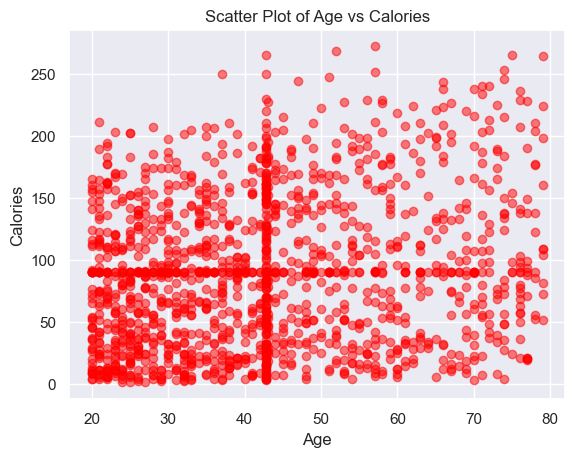

In [60]:
#making age vs calories
plt.title('Scatter Plot of Age vs Calories')
plt.xlabel('Age')
plt.ylabel('Calories')
sampled_data = calories_data_filled.sample(frac=0.1)
plt.scatter(sampled_data['Age'], sampled_data['Calories'], alpha=0.5, c='red')
plt.show()

In [61]:
'''inferences:
this plot shows no correlation between age and calories.
the vertical line represents that max no. of people in our data set have 42
the vertical line represents that max no. of people in our data set have calorie burnt around 95'''

'inferences:\nthis plot shows no correlation between age and calories.\nthe vertical line represents that max no. of people in our data set have 42\nthe vertical line represents that max no. of people in our data set have calorie burnt around 95'

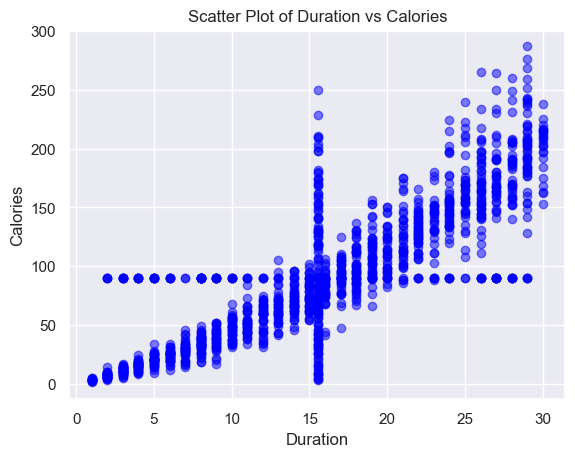

In [62]:
#making a scatter plot of duration of exercise vs calories
plt.title('Scatter Plot of Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
sampled_data = calories_data_filled.sample(frac=0.1)
plt.scatter(sampled_data['Duration'], sampled_data['Calories'], alpha=0.5, c='blue')
plt.show()

In [63]:
'''inferences:
this plot shows a positive correlation between duration and calories.
the vertical line represents that max no. of people in our data set have duration of exercise around 16
the vertical line represents that max no. of people in our data set have calorie burnt around 95'''

'inferences:\nthis plot shows a positive correlation between duration and calories.\nthe vertical line represents that max no. of people in our data set have duration of exercise around 16\nthe vertical line represents that max no. of people in our data set have calorie burnt around 95'

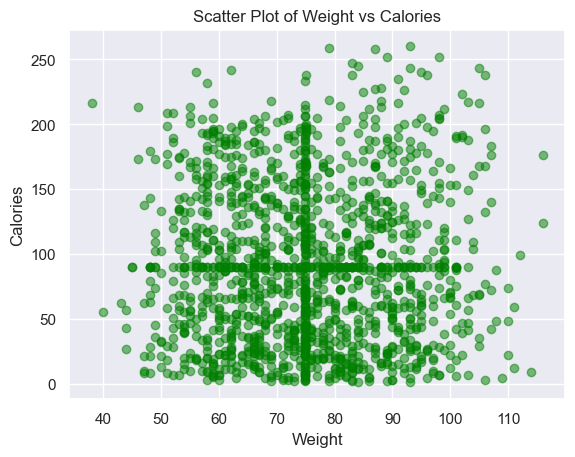

In [64]:
#making a scatter plot of weight vs calories
plt.title('Scatter Plot of Weight vs Calories')
plt.xlabel('Weight')
plt.ylabel('Calories')
sampled_data = calories_data_filled.sample(frac=0.1)
plt.scatter(sampled_data['Weight'], sampled_data['Calories'], alpha=0.5, c='green')
plt.show()

In [65]:
'''inferences:
this plot shows no correlation between weight and calories.
the vertical line represents that max no. of people in our data set have weight around 60
the vertical line represents that max no. of people in our data set have calorie burnt around 95'''

'inferences:\nthis plot shows no correlation between weight and calories.\nthe vertical line represents that max no. of people in our data set have weight around 60\nthe vertical line represents that max no. of people in our data set have calorie burnt around 95'

In [66]:
#The plus sign at the midpoint suggests that there is a direct and proportional relationship between x and y variables. As x increases, y also increases.

In [67]:
#Converting the classification data to categorical data for ease of data manipulation and insights


In [68]:
calories_data_filled.replace({"Gender":{'male':0,'female':1}}, inplace=True)

/var/folders/dt/x562_n_n6ys39cwb8xr4xs9c0000gn/T/ipykernel_6633/3722348018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data_filled.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [69]:
calories_data_filled.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363.0,0.0,68.000000,190.0,94.0,29.000000,95.489188,40.8,231.0
1,14861698.0,NaN,20.000000,166.0,60.0,14.000000,94.000000,40.3,66.0
2,11179863.0,0.0,69.000000,179.0,79.0,5.000000,88.000000,38.7,26.0
3,16180408.0,1.0,42.766383,179.0,71.0,15.551906,100.000000,40.5,71.0
4,17771927.0,NaN,27.000000,154.0,58.0,10.000000,95.489188,39.8,35.0


In [70]:
correlation = calories_data_filled.corr()

<Axes: >

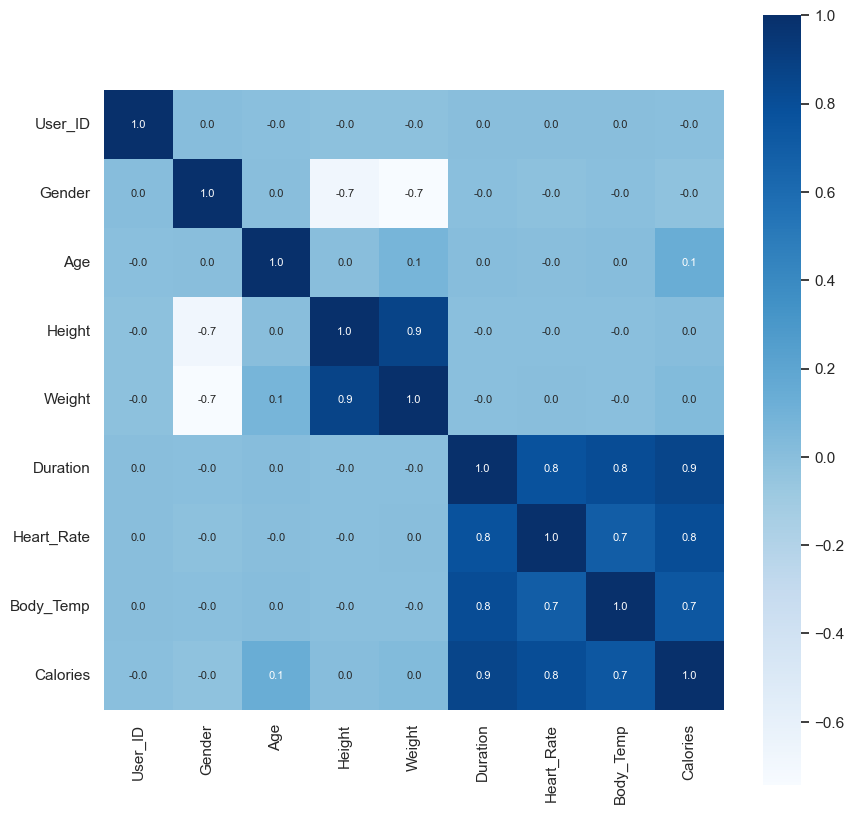

In [71]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [72]:
'''Inferences:
as we can see, the graph shows perfect correlation along diagonal, which is expected.
height and weight are highly positively correlated.
duration and body temperature are also correlated.'''

'Inferences:\nas we can see, the graph shows perfect correlation along diagonal, which is expected.\nheight and weight are highly positively correlated.\nduration and body temperature are also correlated.'

In [73]:
#we are now dropping the one of the two highly correlated attributes (out of weight and height, we are dropping weight)
#this is necessary to avoid data duplicacy
correlation_matrix = calories_data_filled.corr()
# Specify the columns to drop
columns_to_drop = ['Weight']  # Replace with your actual column names
# Identify and drop specified columns
calories_data_filled_filtered = calories_data_filled.drop(columns=columns_to_drop, axis=1)

In [74]:
correlation2=calories_data_filled_filtered.corr()

<Axes: >

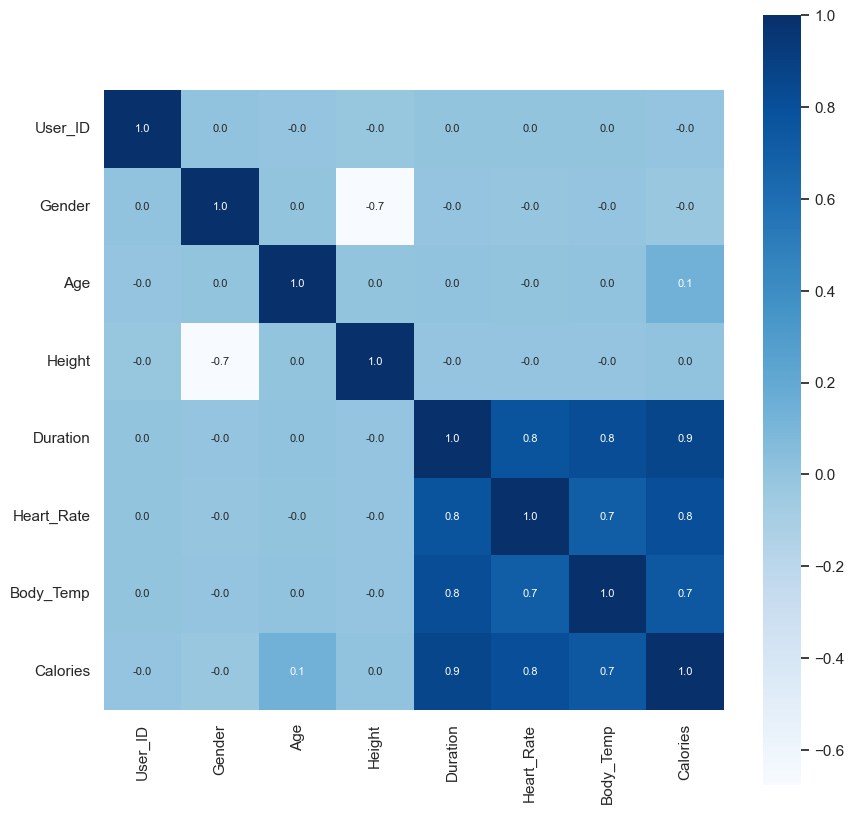

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation2, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [76]:
#now we have no highly correlated attributes

In [77]:
X = calories_data_filled_filtered.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data_filled['Calories']

In [78]:
print(X)

       Gender        Age      Height   Duration  Heart_Rate  Body_Temp
0         0.0  68.000000  190.000000  29.000000   95.489188  40.800000
1         NaN  20.000000  166.000000  14.000000   94.000000  40.300000
2         0.0  69.000000  179.000000   5.000000   88.000000  38.700000
3         1.0  42.766383  179.000000  15.551906  100.000000  40.500000
4         NaN  27.000000  154.000000  10.000000   95.489188  39.800000
...       ...        ...         ...        ...         ...        ...
14995     1.0  20.000000  193.000000  11.000000   92.000000  40.022682
14996     1.0  27.000000  165.000000   6.000000   95.489188  39.200000
14997     1.0  43.000000  174.464143  16.000000   90.000000  40.100000
14998     0.0  78.000000  193.000000   2.000000   84.000000  38.300000
14999     0.0  63.000000  173.000000  18.000000   92.000000  40.500000

[15000 rows x 6 columns]


In [79]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [80]:
#Splitting the data into training data and Test data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [83]:
#Model Training

In [84]:
# loading the model
model = XGBRegressor()

In [85]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
test_data_prediction = model.predict(X_test)

In [87]:
print(test_data_prediction)

[144.53711  207.83507   38.683243 ... 134.96315   34.81562   98.11636 ]


In [88]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [89]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  12.917348470149193
